# Seaborn

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Library documentation: <a>http://stanford.edu/~mwaskom/software/seaborn/</a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Themes

In [ ]:
# global config settings to control things like style, font size, color palette etc.
sb.set(context="notebook", style="darkgrid", palette="dark")

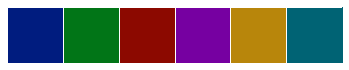

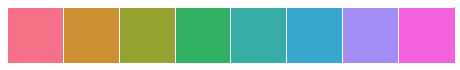

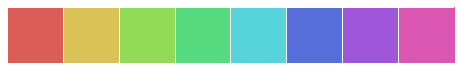

In [ ]:
# seaborn has some nice built-in color palette features
sb.palplot(sb.color_palette())
sb.palplot(sb.color_palette("husl", 8))
sb.palplot(sb.color_palette("hls", 8))

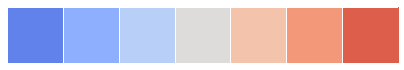

In [ ]:
# matplotlib colormap of evenly spaced colors
sb.palplot(sb.color_palette("coolwarm", 7))

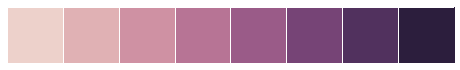

In [ ]:
# sequential palette with linear increase in brightness
sb.palplot(sb.cubehelix_palette(8))

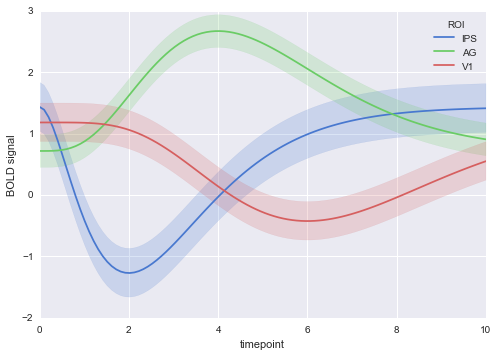

In [ ]:
# palettes are used in a plot via the color paramter
gammas = sb.load_dataset("gammas")
sb.tsplot(gammas, "timepoint", "subject", "ROI", "BOLD signal", color="muted")

### Advanced Plots

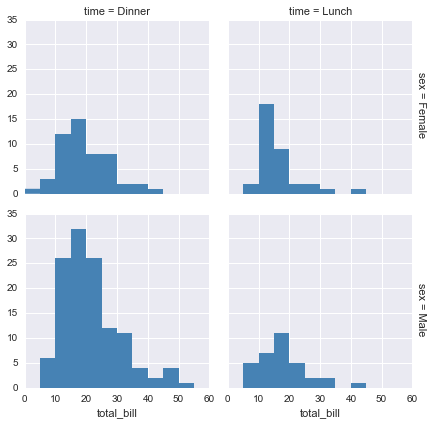

In [ ]:
# facetting histograms by subsets of data
sb.set(style="darkgrid")

tips = sb.load_dataset("tips")
g = sb.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)

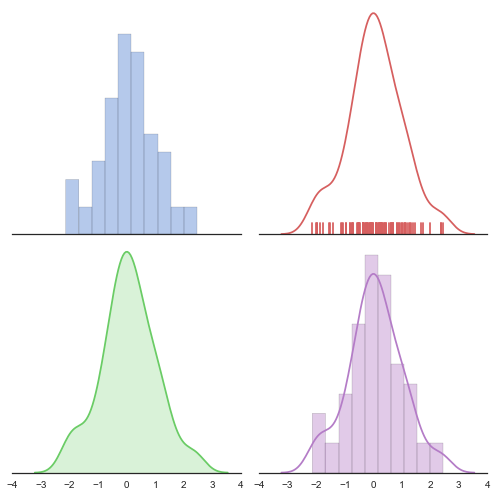

In [ ]:
# several distribution plot examples
sb.set(style="white", palette="muted")
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sb.despine(left=True)

rs = np.random.RandomState(10)

b, g, r, p = sb.color_palette("muted", 4)

d = rs.normal(size=100)

sb.distplot(d, kde=False, color=b, ax=axes[0, 0])
sb.distplot(d, hist=False, rug=True, color=r, ax=axes[0, 1])
sb.distplot(d, hist=False, color=g, kde_kws={"shade": True}, ax=axes[1, 0])
sb.distplot(d, color=p, ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

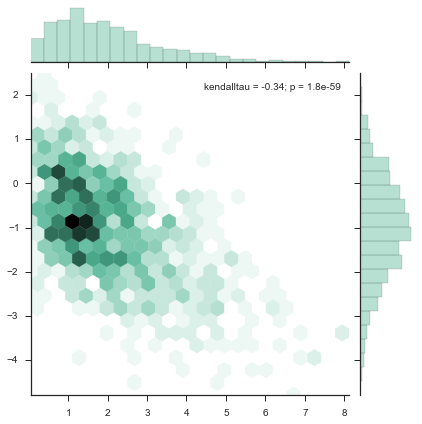

In [ ]:
# hexbin plot with marginal distributions
from scipy.stats import kendalltau
sb.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)
sb.jointplot(x, y, kind="hex", stat_func=kendalltau, color="#4CB391")

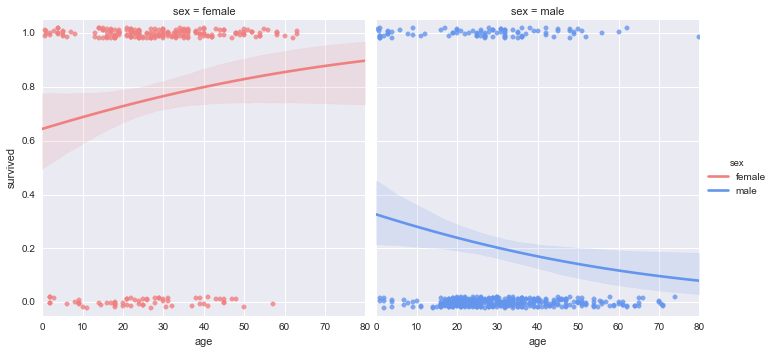

In [ ]:
# faceted logistic regression
sb.set(style="darkgrid")
df = sb.load_dataset("titanic")

pal = dict(male="#6495ED", female="#F08080")
g = sb.lmplot("age", "survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

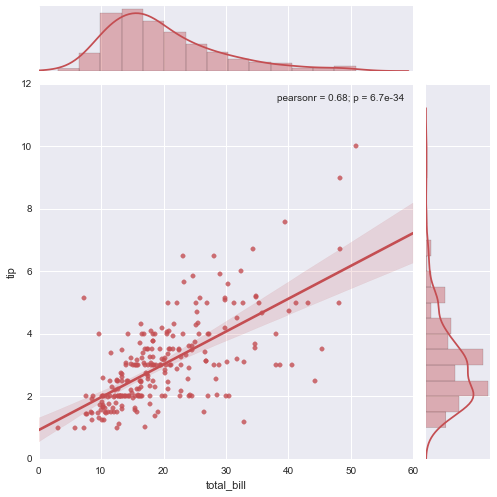

In [ ]:
# linear regression with marginal distributions
sb.set(style="darkgrid")
tips = sb.load_dataset("tips")
color = sb.color_palette()[2]
g = sb.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color=color, size=7)

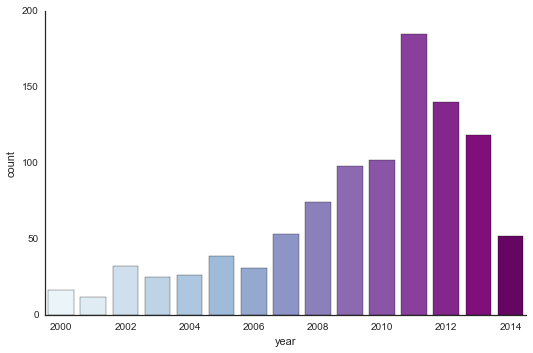

In [ ]:
# time series factor plot
sb.set(style="white")
planets = sb.load_dataset("planets")
years = np.arange(2000, 2015)
g = sb.factorplot("year", data=planets, palette="BuPu",
                   aspect=1.5, x_order=years)
g.set_xticklabels(step=2)

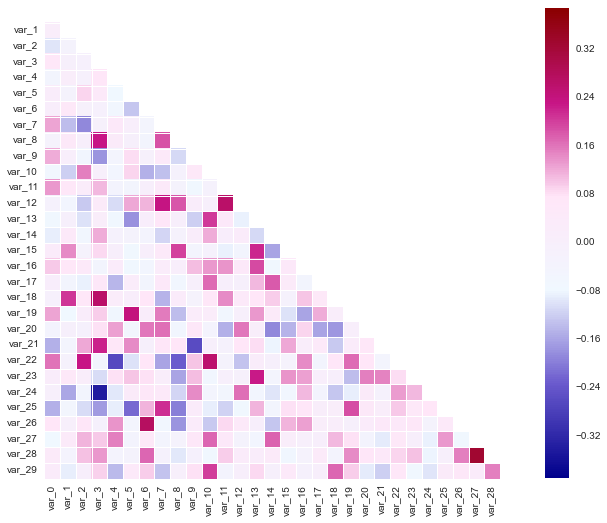

In [ ]:
# correlation matrix
sb.set(style="darkgrid")

rs = np.random.RandomState(33)
d = rs.normal(size=(100, 30))

f, ax = plt.subplots(figsize=(9, 9))
cmap = sb.blend_palette(["#00008B", "#6A5ACD", "#F0F8FF",
                          "#FFE6F8", "#C71585", "#8B0000"], as_cmap=True)
sb.corrplot(d, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

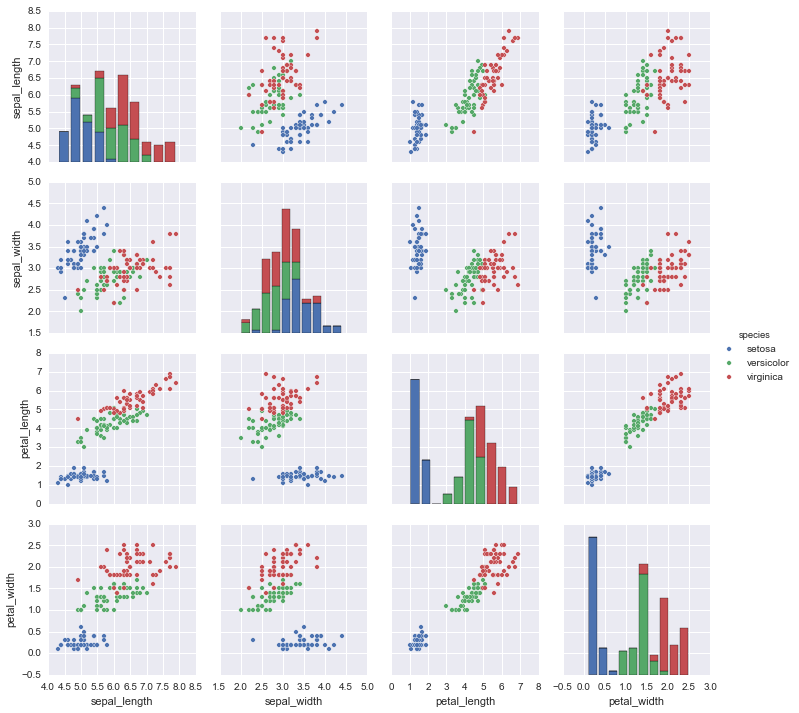

In [ ]:
# pair plot example
sb.set(style="darkgrid")
df = sb.load_dataset("iris")
sb.pairplot(df, hue="species", size=2.5)

In [12]:
df=pd.read_csv('Data.csv')
df.head()

,Name,id,number_project,avg_hrs,time_spent,left,department,salary
0,Kri,87,2,157,3,1,sales,low
1,Samya,204,5,262,6,1,sales,medium
2,Ishita,189,7,223,4,1,sales,medium
3,Pranjal,990,2,159,5,1,sales,low


<Axes: xlabel='number_project', ylabel='avg_hrs'>

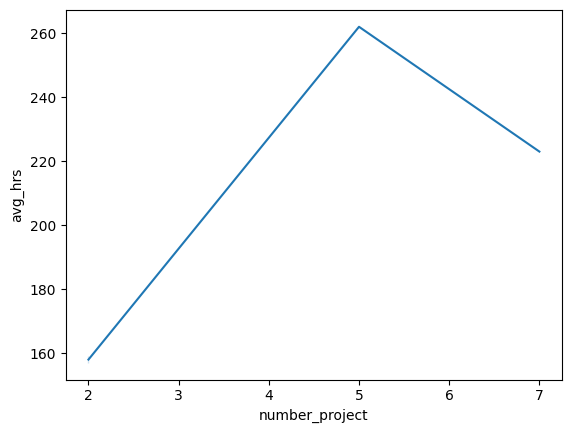

In [15]:
sns.lineplot(x='number_project',y='avg_hrs',data=df)

<ipython-input-16-d879355c6c7d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['time_spent'])


<Axes: xlabel='time_spent', ylabel='Density'>

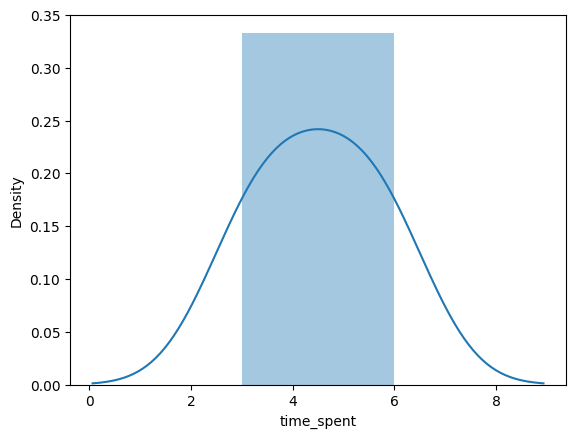

In [16]:
sns.distplot(df['time_spent'])

<ipython-input-17-4416e4f83d5a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['left'])
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='left', ylabel='Density'>

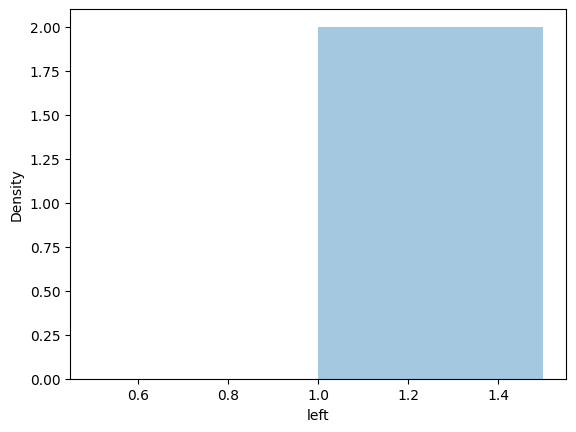

In [17]:
sns.distplot(df['left'])

<ipython-input-18-0a94145af9b8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['avg_hrs'])


<Axes: xlabel='avg_hrs', ylabel='Density'>

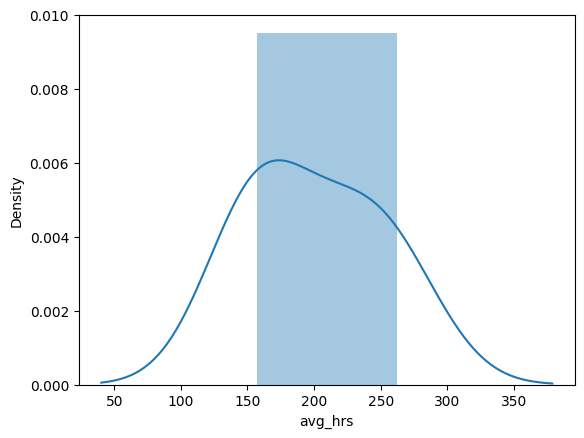

In [18]:
sns.distplot(df['avg_hrs'])

In [19]:
df.describe()

,id,number_project,avg_hrs,time_spent,left
count,4.000000,4.00000,4.000000,4.000000,4.0
mean,367.500000,4.00000,200.250000,4.500000,1.0
std,418.242752,2.44949,51.324945,1.290994,0.0
min,87.000000,2.00000,157.000000,3.000000,1.0
25%,163.500000,2.00000,158.500000,3.750000,1.0
50%,196.500000,3.50000,191.000000,4.500000,1.0
75%,400.500000,5.50000,232.750000,5.250000,1.0
max,990.000000,7.00000,262.000000,6.000000,1.0


<ipython-input-21-106204091566>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['time_spent'],bins=bins)


([<matplotlib.axis.XTick at 0x79310f5a1610>,
 [Text(3, 0, '3'), Text(4, 0, '4'), Text(5, 0, '5'), Text(6, 0, '6')])

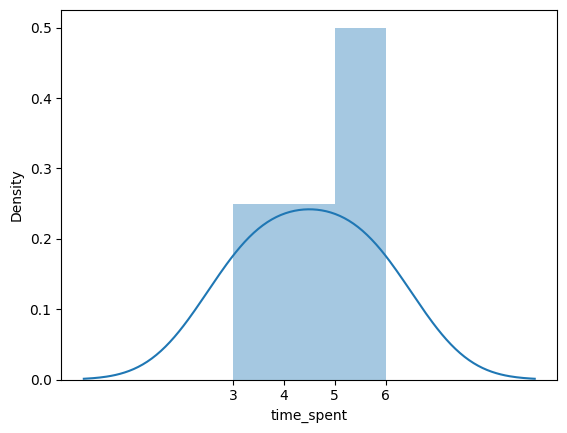

In [21]:
bins=[3,4,5,6]
sns.distplot(df['time_spent'],bins=bins)
plt.xticks(bins)

<ipython-input-22-d37a27b5d7a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['time_spent'],bins=bins,hist=False)


([<matplotlib.axis.XTick at 0x79310f4ef850>,
 [Text(3, 0, '3'), Text(4, 0, '4'), Text(5, 0, '5'), Text(6, 0, '6')])

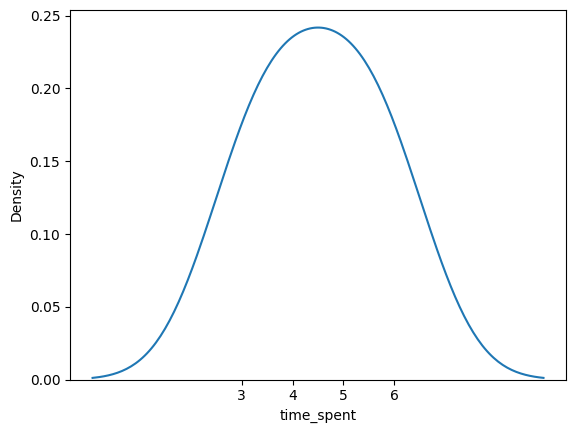

In [22]:
bins=[3,4,5,6]
sns.distplot(df['time_spent'],bins=bins,hist=False)
plt.xticks(bins)

In [23]:
titanic_df=sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='fare'>

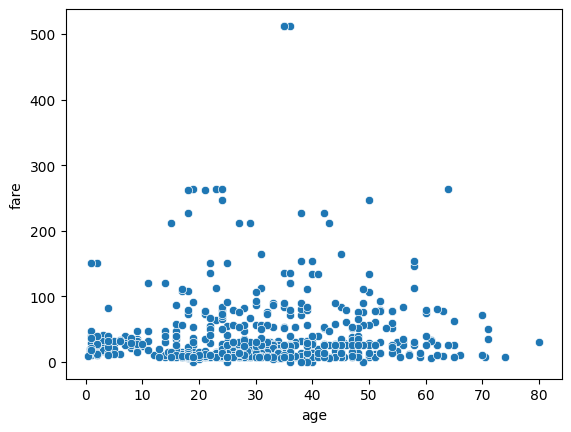

In [24]:
sns.scatterplot(x='age',y='fare',data=titanic_df)

<Axes: xlabel='age', ylabel='fare'>

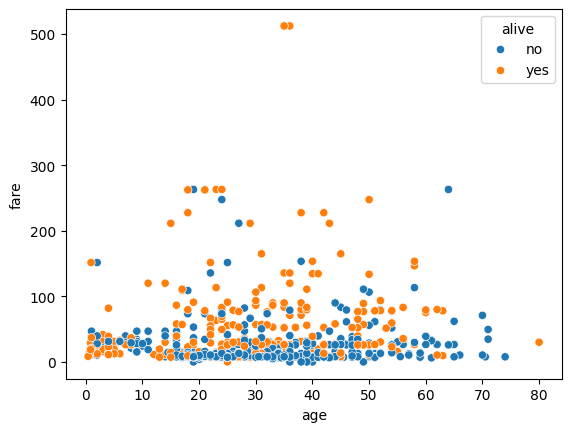

In [25]:
sns.scatterplot(x='age',y='fare',data=titanic_df,
                hue='alive')

<Axes: xlabel='age', ylabel='fare'>

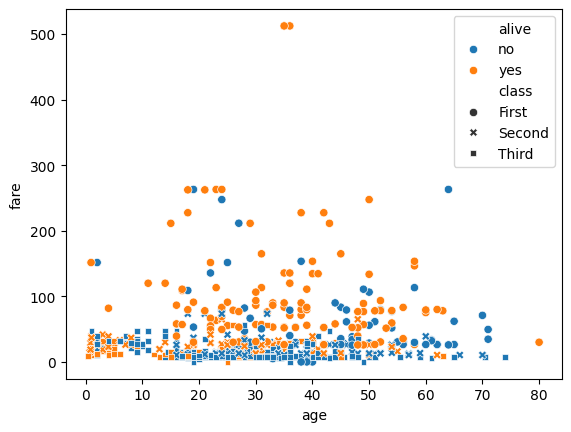

In [26]:
sns.scatterplot(x='age',y='fare',data=titanic_df,
                hue='alive',style='class')

Text(0.5, 1.0, 'Titanic Data Distribution')

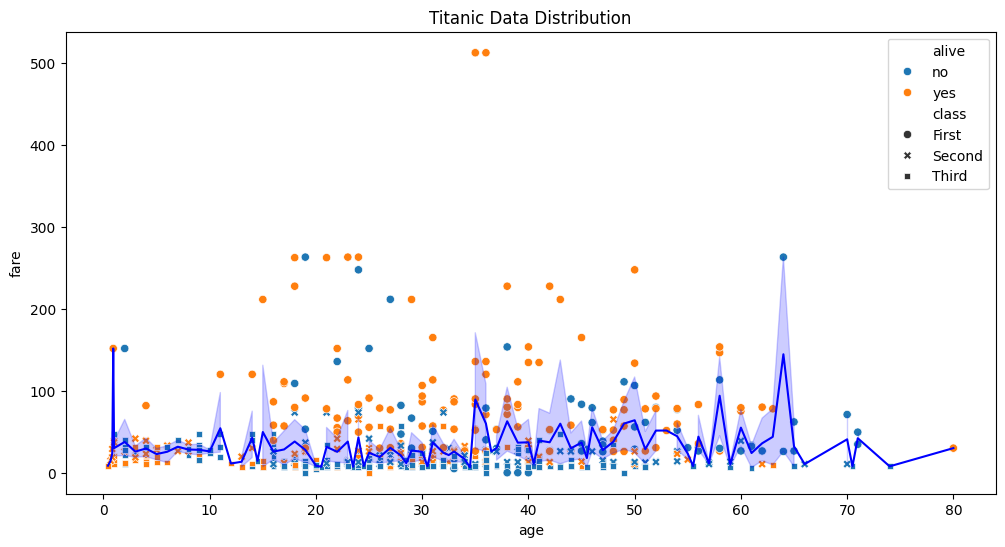

In [32]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='age',y='fare',data=titanic_df,
                hue='alive',style='class')
sns.lineplot(x='age',y='fare',data=titanic_df,color='blue')
plt.title('Titanic Data Distribution')

<Axes: xlabel='class', ylabel='fare'>

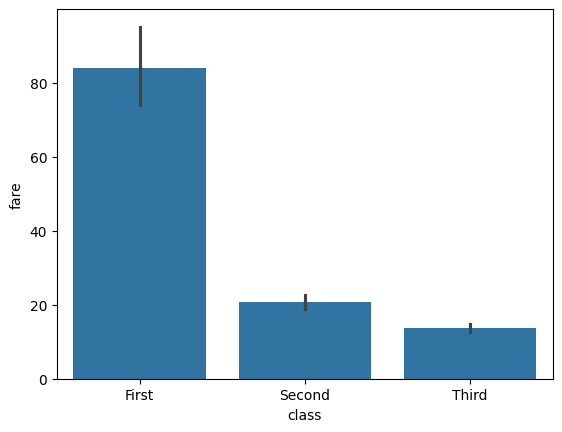

In [33]:
sns.barplot(x='class',y='fare',data=titanic_df)

<Axes: xlabel='class', ylabel='fare'>

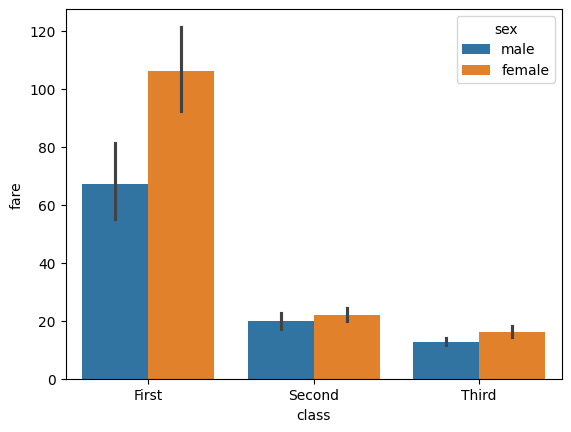

In [34]:
sns.barplot(x='class',y='fare',data=titanic_df,hue='sex')